In [1]:
# Our main aim is to predict whether the image contains a star or a galaxy with the help of Python programming. 
# To implement our model efficiently using Neural Networks.

In [2]:
# import library, the libraries we will be using are TensorFlow and Keras.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(960, 960, 3)


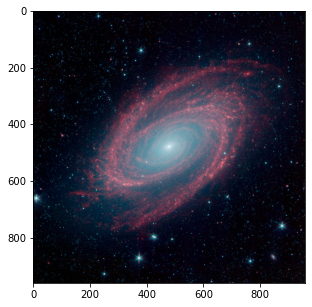

In [3]:
from glob import glob #retriving an array of files in directories
path_train = "C:\\Users\\Dell\\OneDrive\\Desktop\\Nithya VB\\Capstone\\training_set\\galaxy"
img = glob(path_train+"/ssc2019-15a_Sm.jpg")
# print(img)
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)
print(img.shape)

(167, 152, 3)


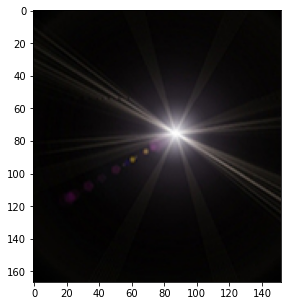

In [4]:
from glob import glob #retriving an array of files in directories
path_train = "C:\\Users\\Dell\\OneDrive\\Desktop\\Nithya VB\\Capstone\\training_set\\stars"
img = glob(path_train+"/star (135).jpg")
# print(img)
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)
print(img.shape)

In [5]:
#Specifiying the folder where images are present
TrainingIP="C:\\Users\\Dell\\OneDrive\\Desktop\\Nithya VB\\Capstone\\training_set"

In [6]:
validationIP="C:\\Users\\Dell\\OneDrive\\Desktop\\Nithya VB\\Capstone\\test_set"

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Base model
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
##Generating the Training data
training_set = train_datagen.flow_from_directory(TrainingIP, target_size=(64,64), batch_size=20, class_mode='binary')

Found 790 images belonging to 2 classes.


In [10]:
#Generating the validation data
validation_set = test_datagen.flow_from_directory(validationIP, target_size=(64,64), batch_size=20, class_mode='binary')

Found 273 images belonging to 2 classes.


In [11]:
# Initializing the Convolution Neural Network
classifier= Sequential()

In [12]:
# step_1 Convolution
# Adding the first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size(64*64) pixels representing RED,
# Green and Blue components of pixels

classifier.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64,64,3), activation='relu'))
# step_2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))
'''Additional layer of Convolution for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))
'''Additional layer of Convolution for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

# Step_3 Flattening
classifier.add(Flatten())

'''# Step_4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(11, activation='sigmoid'))


In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [14]:
# Compliling the CNN
classifier.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [15]:
# Execution of model
history = classifier.fit(training_set, validation_data=validation_set, epochs=20)

Epoch 1/20
40/40 [==============================] - 66s 1s/step - loss: 0.7651 - accuracy: 0.6949 - val_loss: 0.3881 - val_accuracy: 0.8938
Epoch 2/20
40/40 [==============================] - 12s 307ms/step - loss: 0.3803 - accuracy: 0.8494 - val_loss: 0.2235 - val_accuracy: 0.9341
Epoch 3/20
40/40 [==============================] - 13s 316ms/step - loss: 0.2211 - accuracy: 0.9139 - val_loss: 0.1281 - val_accuracy: 0.9524
Epoch 4/20
40/40 [==============================] - 13s 313ms/step - loss: 0.2311 - accuracy: 0.9101 - val_loss: 0.2425 - val_accuracy: 0.8938
Epoch 5/20
40/40 [==============================] - 11s 274ms/step - loss: 0.1742 - accuracy: 0.9380 - val_loss: 0.1074 - val_accuracy: 0.9597
Epoch 6/20
40/40 [==============================] - 12s 292ms/step - loss: 0.1439 - accuracy: 0.9342 - val_loss: 0.0940 - val_accuracy: 0.9597
Epoch 7/20
40/40 [==============================] - 14s 349ms/step - loss: 0.1153 - accuracy: 0.9582 - val_loss: 0.1602 - val_accuracy: 0.9377
Ep

In [16]:
# Visualization
# Curves of loss and accuracy during training
import matplotlib.pyplot as plt

In [17]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

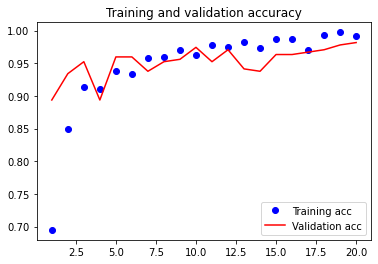

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

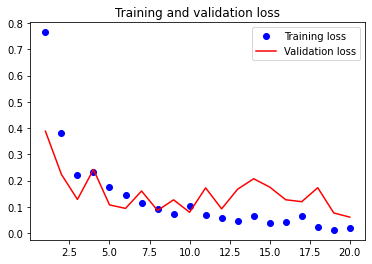

<Figure size 432x288 with 0 Axes>

In [19]:
# Loss_base_model
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [20]:
## let's improve ##
# Model 2

In [21]:
# Adding parameter in the ImageDatagenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.5, zoom_range=0.5, width_shift_range=0.2, height_shift_range=0.2)
# No transformation are done on the testing images.
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Generating the Training data
training_set = train_datagen.flow_from_directory(TrainingIP, target_size=(64,64), batch_size=25, class_mode='binary')

Found 790 images belonging to 2 classes.


In [23]:
# Generating the validation data
validation_set = test_datagen.flow_from_directory(validationIP, target_size=(64,64), batch_size=25, class_mode='binary')

Found 273 images belonging to 2 classes.


In [24]:
classifier= Sequential()

In [25]:
classifier.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(11, activation='sigmoid'))


In [26]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

In [27]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [28]:
history = classifier.fit_generator(training_set, epochs=100, validation_data=validation_set)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12960\3395352187.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=100, validation_data=validation_set)


Epoch 1/100
32/32 [==============================] - 16s 460ms/step - loss: 0.8015 - accuracy: 0.6468 - val_loss: 0.4974 - val_accuracy: 0.7839
Epoch 2/100
32/32 [==============================] - 14s 434ms/step - loss: 0.4997 - accuracy: 0.7519 - val_loss: 0.2198 - val_accuracy: 0.9231
Epoch 3/100
32/32 [==============================] - 16s 500ms/step - loss: 0.3857 - accuracy: 0.8228 - val_loss: 0.1714 - val_accuracy: 0.9377
Epoch 4/100
32/32 [==============================] - 13s 427ms/step - loss: 0.4002 - accuracy: 0.8392 - val_loss: 0.1498 - val_accuracy: 0.9597
Epoch 5/100
32/32 [==============================] - 13s 414ms/step - loss: 0.3368 - accuracy: 0.8519 - val_loss: 0.1270 - val_accuracy: 0.9634
Epoch 6/100
32/32 [==============================] - 12s 381ms/step - loss: 0.2732 - accuracy: 0.8873 - val_loss: 0.1184 - val_accuracy: 0.9670
Epoch 7/100
32/32 [==============================] - 14s 426ms/step - loss: 0.2408 - accuracy: 0.9152 - val_loss: 0.1160 - val_accuracy:

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

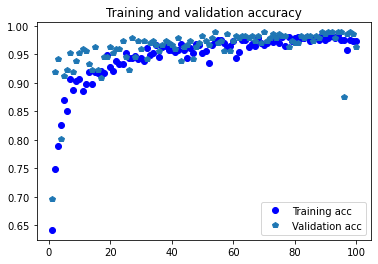

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'p', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

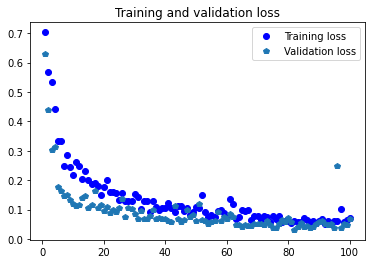

<Figure size 432x288 with 0 Axes>

In [54]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'p', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

## SVM model

In [32]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [33]:
# step_1 Convolution
# Adding the first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size(64*64) pixels representing RED,
# Green and Bkue components of pixels
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
# step_2 Max plooing
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
'''Additional layer of Convolution for better accuracy'''
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
'''Additional layer of Convolution for better accuracy'''
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
'''Flattening'''
model.add(Flatten())
model.add(Dense(128,activation="relu"))
#Support Vector Machine for binary classification we use something called LinearSVM.
#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [35]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [36]:
history = model.fit(x = training_set, validation_data = validation_set, epochs=20)

Epoch 1/20
32/32 [==============================] - 19s 497ms/step - loss: 0.6950 - accuracy: 0.6532 - val_loss: 0.6799 - val_accuracy: 0.6960
Epoch 2/20
32/32 [==============================] - 11s 353ms/step - loss: 0.5678 - accuracy: 0.7937 - val_loss: 0.3882 - val_accuracy: 0.9084
Epoch 3/20
32/32 [==============================] - 10s 309ms/step - loss: 0.4895 - accuracy: 0.8215 - val_loss: 0.2008 - val_accuracy: 0.9451
Epoch 4/20
32/32 [==============================] - 10s 293ms/step - loss: 0.3328 - accuracy: 0.8646 - val_loss: 0.1451 - val_accuracy: 0.9487
Epoch 5/20
32/32 [==============================] - 10s 320ms/step - loss: 0.3303 - accuracy: 0.8506 - val_loss: 0.1656 - val_accuracy: 0.9487
Epoch 6/20
32/32 [==============================] - 10s 307ms/step - loss: 0.3111 - accuracy: 0.8646 - val_loss: 0.1337 - val_accuracy: 0.9597
Epoch 7/20
32/32 [==============================] - 10s 310ms/step - loss: 0.3025 - accuracy: 0.8810 - val_loss: 0.1548 - val_accuracy: 0.9158

In [37]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

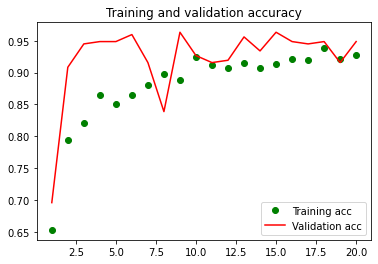

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

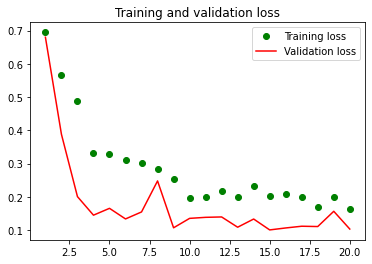

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [40]:
# Adding parameter in the ImageDatagenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.5, zoom_range=0.5, width_shift_range=0.2, height_shift_range=0.2)
# No transformation are done on the testing images.
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
# Generating the Training data
training_set = train_datagen.flow_from_directory(TrainingIP, target_size=(64,64), batch_size=25, class_mode='binary')

Found 790 images belonging to 2 classes.


In [42]:
# Generating the validation data
validation_set = test_datagen.flow_from_directory(validationIP, target_size=(64,64), batch_size=25, class_mode='binary')

Found 273 images belonging to 2 classes.


In [43]:
classifier= Sequential()

In [44]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
# step_2 Max plooing
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
'''Additional layer of Convolution for better accuracy'''
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
'''Additional layer of Convolution for better accuracy'''
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
'''Flattening'''
model.add(Flatten())
model.add(Dense(128,activation="relu"))
#Support Vector Machine for binary classification we use something called LinearSVM.
#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [46]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [47]:
history = model.fit(x = training_set, validation_data = validation_set, epochs=100)

Epoch 1/100
32/32 [==============================] - 13s 353ms/step - loss: 0.7030 - accuracy: 0.6418 - val_loss: 0.6297 - val_accuracy: 0.6960
Epoch 2/100
32/32 [==============================] - 10s 313ms/step - loss: 0.5677 - accuracy: 0.7481 - val_loss: 0.4378 - val_accuracy: 0.9194
Epoch 3/100
32/32 [==============================] - 10s 307ms/step - loss: 0.5340 - accuracy: 0.7886 - val_loss: 0.3043 - val_accuracy: 0.9414
Epoch 4/100
32/32 [==============================] - 10s 322ms/step - loss: 0.4438 - accuracy: 0.8266 - val_loss: 0.3129 - val_accuracy: 0.8022
Epoch 5/100
32/32 [==============================] - 10s 324ms/step - loss: 0.3318 - accuracy: 0.8696 - val_loss: 0.1783 - val_accuracy: 0.9121
Epoch 6/100
32/32 [==============================] - 9s 297ms/step - loss: 0.3336 - accuracy: 0.8506 - val_loss: 0.1634 - val_accuracy: 0.9231
Epoch 7/100
32/32 [==============================] - 9s 290ms/step - loss: 0.2478 - accuracy: 0.9076 - val_loss: 0.1470 - val_accuracy: 0

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

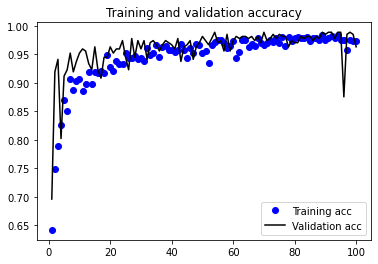

<Figure size 432x288 with 0 Axes>

In [56]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

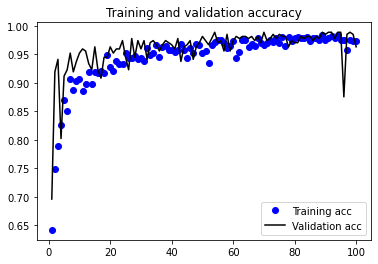

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()